In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
ddata = pd.read_csv('us_contagious_diseases.csv')
hepdata = ddata[ddata['disease'] == "Hepatitis A"]
hepdata_clean = hepdata.dropna()
hepdata_clean.head()
#Shalanda's rate function
for index, row in hepdata_clean.iterrows():
    if row['weeks_reporting'] == 0:
        hepdata_clean.loc[index,'rate'] = 0
    else:
        hepdata_clean.loc[index,'rate'] = (row['count']/row['population'])*10000 * (52/ row['weeks_reporting'])

hepdata_clean.head()

,disease,state,year,weeks_reporting,count,population,rate
0,Hepatitis A,Alabama,1966,50,321,3345787.0,0.997792
1,Hepatitis A,Alabama,1967,49,291,3364130.0,0.917968
2,Hepatitis A,Alabama,1968,52,314,3386068.0,0.927329
3,Hepatitis A,Alabama,1969,49,380,3412450.0,1.181747
4,Hepatitis A,Alabama,1970,51,413,3444165.0,1.222642


In [3]:
## Different Disease Types
dataset = pd.read_csv('us_contagious_diseases.csv')
disease_types = dataset['disease'].unique()
print("Different Disease Types:", disease_types)

Different Disease Types: ['Hepatitis A' 'Measles' 'Mumps' 'Pertussis' 'Polio' 'Rubella' 'Smallpox']


In [4]:
# Range of Years for Hepatitis A
hepatitis_a_years = dataset[dataset['disease'] == 'Hepatitis A']['year'].unique()
print("Range of Years for Hepatitis A:", hepatitis_a_years)

Range of Years for Hepatitis A: [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011]


In [5]:
# Summary Statistics for Weeks Reporting and Count
dataset['count'] = pd.to_numeric(dataset['count'], errors='coerce')

# Convert 'count' to numeric if it's not already
dataset['count'] = pd.to_numeric(dataset['count'], errors='coerce')

# Generate summary statistics
summary_stats = dataset[['weeks_reporting', 'count']].describe()

print("Summary Statistics for Weeks Reporting and Count:")
print(summary_stats)

Summary Statistics for Weeks Reporting and Count:
       weeks_reporting          count
count     18870.000000   18870.000000
mean         33.281558    1367.530578
std          20.105653    5506.530241
min           0.000000       0.000000
25%          14.000000       1.000000
50%          44.000000      47.000000
75%          50.000000     440.750000
max          52.000000  132342.000000


In [6]:
# Years with the Highest Number of Cases

# Convert 'count' to numeric if it's not already
dataset['count'] = pd.to_numeric(dataset['count'], errors='coerce')

# Filter by Hepatitis A
hepatitis_a_data = dataset[dataset['disease'] == 'Hepatitis A']

# Group by 'year' and 'location', summing up the 'count'
grouped_data = hepatitis_a_data.groupby(['year', 'state']).agg({'count': 'sum'}).reset_index()

# Find the row with the maximum count
max_cases_row = grouped_data.loc[grouped_data['count'].idxmax()]

# Extract the information
hepatitis_a_max_cases_year = max_cases_row['year']
max_cases = max_cases_row['count']

print("Year with the Highest Number of Cases for Hepatitis A:", hepatitis_a_max_cases_year)
print("Number of Cases in that Year:", max_cases)

Year with the Highest Number of Cases for Hepatitis A: 1968
Number of Cases in that Year: 10821


In [7]:
#Extract Hepatitis A from the disease variable. Only for MD state on or after year 2000.
dataset = pd.read_csv('us_contagious_diseases.csv')
if 'Hepatitis A' in dataset['disease'].unique():
    dataset = dataset[(dataset['disease'] == 'Hepatitis A') & (dataset['state'] == 'Maryland') & (dataset['year'] > 1999)]

#display the first 5 rows of the dataset
dataset.head()

,disease,state,year,weeks_reporting,count,population
954,Hepatitis A,Maryland,2000,41,187,5296486.0
955,Hepatitis A,Maryland,2001,40,255,5343114.0
956,Hepatitis A,Maryland,2002,48,305,5389912.0
957,Hepatitis A,Maryland,2003,47,165,5436907.0
958,Hepatitis A,Maryland,2004,45,99,5484121.0


In [8]:
# Creating feature and target arrays
# Create X from the population column's values
X = np.array (dataset["population"])

# Create y from the count column's values
y = np.array ( dataset["count"])

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)


(12, 1) (12,)


In [9]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[233.71466906 212.07476969 190.35597388 168.54575103 146.63389101]


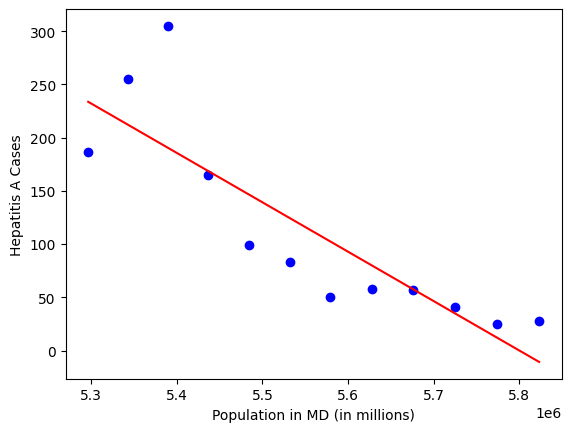

In [10]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Population in MD (in millions)")
plt.ylabel("Hepatitis A Cases")

# Display the plot
plt.show()

In [11]:
dataset1 = pd.read_csv('us_contagious_diseases.csv')
#display the first 5 rows of the dataset
dataset1.head()

,disease,state,year,weeks_reporting,count,population
0,Hepatitis A,Alabama,1966,50,321,3345787.0
1,Hepatitis A,Alabama,1967,49,291,3364130.0
2,Hepatitis A,Alabama,1968,52,314,3386068.0
3,Hepatitis A,Alabama,1969,49,380,3412450.0
4,Hepatitis A,Alabama,1970,51,413,3444165.0


In [12]:
#display the last 5 rows of the dataset
dataset1.tail()

,disease,state,year,weeks_reporting,count,population
18865,Smallpox,Wyoming,1949,0,0,285544.0
18866,Smallpox,Wyoming,1950,1,2,290529.0
18867,Smallpox,Wyoming,1951,1,1,295744.0
18868,Smallpox,Wyoming,1952,1,1,301083.0
18869,Smallpox,Wyoming,1953,0,0,306410.0


In [13]:
# Rename diseases in the disease column

dataset1['disease'] = dataset1['disease'].replace({'Hepatitis A': 'hep_a', 'Measles':'measles', 'Mumps':'mumps', 'Pertussis':'pertussis', 'Polio':'polio', 'Rubella':'rubella', 'Smallpox':'smallpox'})

#display uniqu values in the disease column
dataset1['disease'].unique()

array(['hep_a', 'measles', 'mumps', 'pertussis', 'polio', 'rubella',
       'smallpox'], dtype=object)

In [14]:
#display unique values in the state column
dataset1['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [15]:
# create a new variable called rate and calculate the rate of the disease per 1000 people calculate row by row
for index, row in dataset1.iterrows():
    if row['weeks_reporting'] == 0:
        dataset1.loc[index,'rate'] = 0
    else:
        dataset1.loc[index,'rate'] = (row['count']/row['population'])*10000 * (52/ row['weeks_reporting'])

In [16]:
#create list of regions in the united states
west=['Alaska','Arizona','California','Colorado','Hawaii','Idaho','Montana','Nevada','New Mexico','Oregon','Utah','Washington','Wyoming']
south=["Alabama", "Arkansas", "Delaware", "District Of Columbia", "Florida", "Georgia", "Kentucky", "Louisiana","Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", "Virginia", "West Virginia"]
midwest=["Illinois", "Indiana", "Iowa", "Kansas", "Michigan","Minnesota", "Missouri", "Nebraska", "North Dakota","Ohio", "South Dakota", "Wisconsin"]
northeast=["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New Jersey", "New York","Pennsylvania", "Rhode Island", "Vermont"]

In [17]:
#create a new variable called region and assign the region to each state
for index, row in dataset1.iterrows():
    if row['state'] in west:
        dataset1.loc[index,'region'] = 'west'
    elif row['state'] in south:
        dataset1.loc[index,'region'] = 'south'
    elif row['state'] in midwest:
        dataset1.loc[index,'region'] = 'midwest'
    elif row['state'] in northeast:
        dataset1.loc[index,'region'] = 'northeast'
    else:
        dataset1.loc[index,'region'] = 'NA'

In [18]:
print(dataset1.describe())
print("The length of the dataset is: ", len(dataset1))

               year  weeks_reporting          count    population  \
count  18870.000000     18870.000000   18870.000000  1.866600e+04   
mean    1974.100000        33.281558    1367.530578  4.242911e+06   
std       21.776419        20.105653    5506.530241  4.804728e+06   
min     1928.000000         0.000000       0.000000  8.685300e+04   
25%     1956.000000        14.000000       1.000000  1.046542e+06   
50%     1977.000000        44.000000      47.000000  2.824918e+06   
75%     1992.000000        50.000000     440.750000  5.153640e+06   
max     2011.000000        52.000000  132342.000000  3.760752e+07   

               rate  
count  18842.000000  
mean       5.034454  
std       15.585411  
min        0.000000  
25%        0.012081  
50%        0.223646  
75%        2.137666  
max      367.024280  
The length of the dataset is:  18870


In [19]:
#Extract Maryland from the state variable
if 'Maryland' in dataset1['state'].unique():
    md_data = dataset1[dataset1['state'] == 'Maryland']
#display uniqu values in the state column
dataset1['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [20]:
print(md_data.describe())
print("The length of the dataset is: ", len(md_data))

              year  weeks_reporting         count    population        rate
count   370.000000       370.000000    370.000000  3.700000e+02  370.000000
mean   1974.100000        36.916216   1019.205405  3.887251e+06    4.977833
std      21.805329        19.202416   2919.822026  1.236263e+06   16.214993
min    1928.000000         0.000000      0.000000  1.598519e+06    0.000000
25%    1956.250000        32.000000      1.250000  2.792812e+06    0.009243
50%    1977.000000        47.000000     74.000000  4.138611e+06    0.167440
75%    1992.000000        51.000000    439.000000  4.899046e+06    1.504667
max    2011.000000        52.000000  26948.000000  5.823082e+06  159.406479
The length of the dataset is:  370


In [21]:
# Drop non-numeric columns that cannot be used in the model directly
md_data = md_data.drop(['disease', 'state', 'region'], axis=1)

In [22]:
#split the md_data into a training set and a testing set.
x= md_data.drop('rate', axis = 1)
y= md_data['rate']
print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20)

(370, 4) (370,)


In [23]:
x_train.shape,y_train.shape

((296, 4), (296,))

In [24]:
##Building and train the linear regression model.
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = lin_model.predict(x_test)

In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 3.077918595201315
R-squared Score: 0.965326754468368


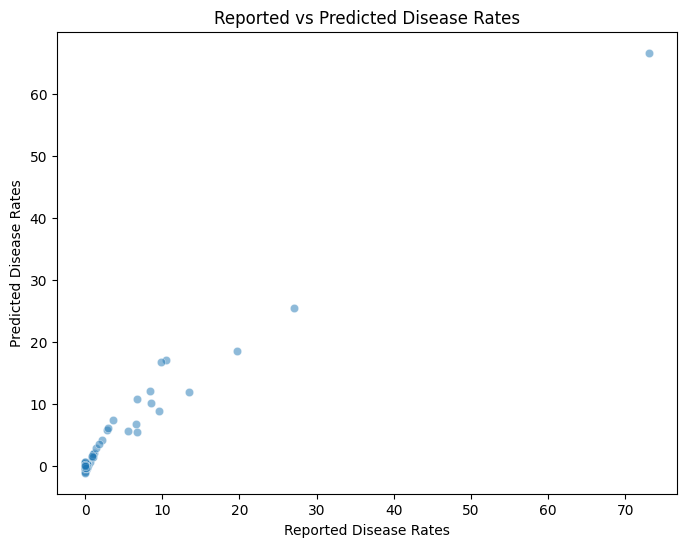

In [28]:
# Visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title('Reported vs Predicted Disease Rates')
plt.xlabel('Reported Disease Rates')
plt.ylabel('Predicted Disease Rates')
plt.show()

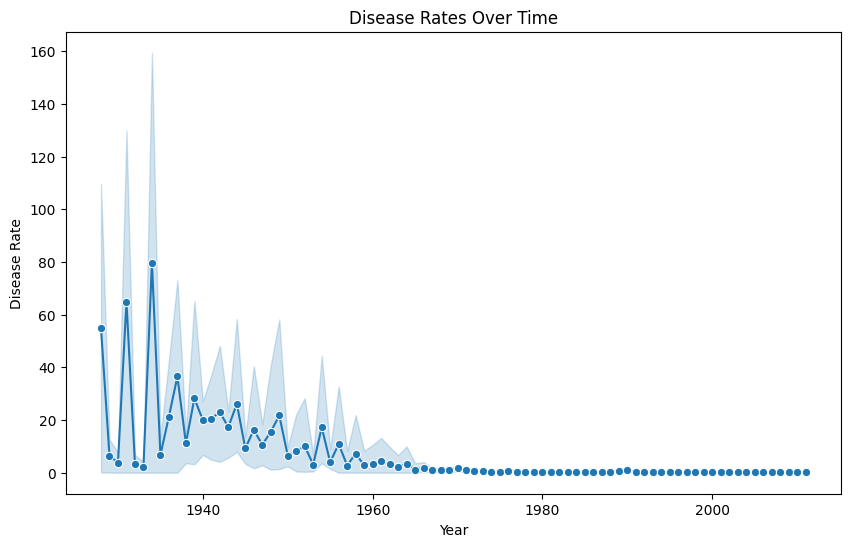

In [29]:
# Sort the dataset by 'year' for a chronological order
md_data_sorted = md_data.sort_values('year')

# Set Seaborn style
sns.husl_palette(as_cmap=True)
# Create the time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rate', data=md_data_sorted, marker='o')
plt.title('Disease Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Disease Rate')
plt.show()

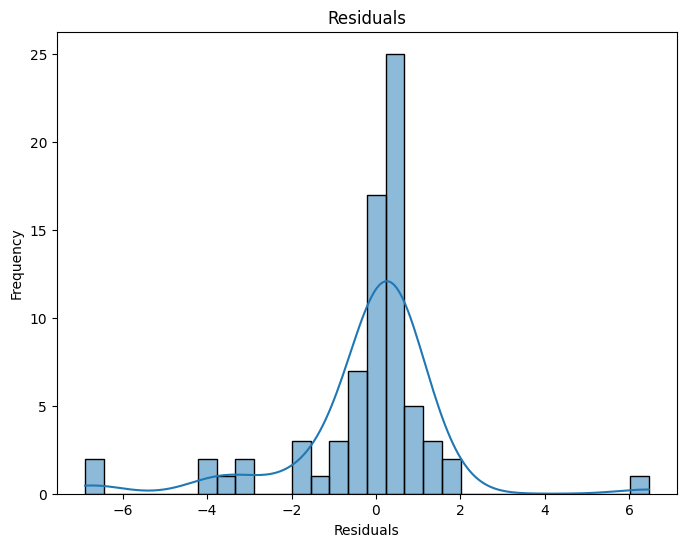

In [30]:
# find the residuals and plot a histogram

residuals= y_test-y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde = True)
plt.title("Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [31]:
###################

In [32]:
yeararray = hepdata_clean['year'].unique()
print(yeararray)

[1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011]


In [33]:
#Nested for loop in a for loop to average the infection rate from each state by year (making it a US rate) 

yearmean = []
for i in yeararray:
    rateholder = []
    for index, row in hepdata_clean.iterrows():
      if row['year'] == i:
        rateholder.append(row['rate'])
    yearmean.append([i, statistics.mean(rateholder)])

print(yearmean)

[[1966, 1.8643446924232092], [1967, 2.039541322767282], [1968, 2.31718774152369], [1969, 2.5191122456273405], [1970, 2.998859478223689], [1971, 3.2462815391359157], [1972, 2.936779520474307], [1973, 2.681938237622732], [1974, 2.379445221242545], [1975, 2.133988084202586], [1976, 4.046289512178224], [1977, 1.9076943962198316], [1978, 1.7313810619447967], [1979, 1.5904285754014478], [1980, 1.399897581777926], [1981, 1.2183138062970595], [1982, 1.0769307714684664], [1983, 1.086860457867612], [1984, 1.0904821268217442], [1985, 1.2071398797941502], [1986, 1.1308925957574245], [1987, 1.284689318871805], [1988, 1.3429644288405012], [1989, 1.6990078956302985], [1990, 1.374357001618707], [1991, 1.234952671854224], [1992, 0.9885754909016881], [1993, 1.0535325152997996], [1994, 1.1140574302548556], [1995, 1.232464574574412], [1996, 1.1984392148225602], [1997, 0.975226703412869], [1998, 0.7149058212681796], [1999, 0.47653610099075333], [2000, 0.363582653093172], [2001, 0.350144085080325], [2002, 0

In [34]:
yearmeannp = np.array(yearmean)
yearmeanX = yearmeannp[:, 0].reshape((-1, 1))
yearmeanY = yearmeannp[:, 1]
print(yearmeanX)

[[1966.]
 [1967.]
 [1968.]
 [1969.]
 [1970.]
 [1971.]
 [1972.]
 [1973.]
 [1974.]
 [1975.]
 [1976.]
 [1977.]
 [1978.]
 [1979.]
 [1980.]
 [1981.]
 [1982.]
 [1983.]
 [1984.]
 [1985.]
 [1986.]
 [1987.]
 [1988.]
 [1989.]
 [1990.]
 [1991.]
 [1992.]
 [1993.]
 [1994.]
 [1995.]
 [1996.]
 [1997.]
 [1998.]
 [1999.]
 [2000.]
 [2001.]
 [2002.]
 [2003.]
 [2004.]
 [2005.]
 [2006.]
 [2007.]
 [2008.]
 [2009.]
 [2010.]
 [2011.]]


In [35]:
model = LinearRegression()
model.fit(yearmeanX, yearmeanY)

LinearRegression()

In [36]:
r_sq = model.score(yearmeanX, yearmeanY)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7817594967994173


In [37]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(yearmeanX, yearmeanY, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [38]:
y_guess = regressor.predict(X_test)

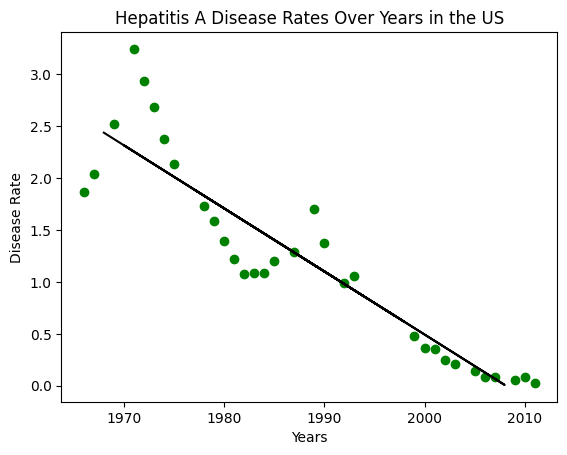

In [39]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_guess,color='k')
plt.xlabel("Years")
plt.ylabel("Disease Rate")
plt.title("Hepatitis A Disease Rates Over Years in the US")
plt.show()

In [40]:
#Degree of relationship
r_sq = regressor.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8452472424471257


In [41]:
#mean squared error on testing data
testmeansqerr = mean_squared_error(y_true = y_test, y_pred = regressor.predict(X_test))
print(testmeansqerr)

0.3953465754863373


In [42]:
#mean squared error on training data (naturally training data would have less error compared to the MSE on the testing data bc we trained the model off of it)
trainmeansqerr = mean_squared_error(y_true = y_train, y_pred = regressor.predict(X_train))
print(trainmeansqerr)

0.1295322421189203


(array([4., 4., 4., 1., 0., 0., 0., 0., 0., 1.]),
 array([-0.21421686,  0.0165478 ,  0.24731246,  0.47807712,  0.70884178,
         0.93960644,  1.1703711 ,  1.40113576,  1.63190042,  1.86266508,
         2.09342974]),
 <BarContainer object of 10 artists>)

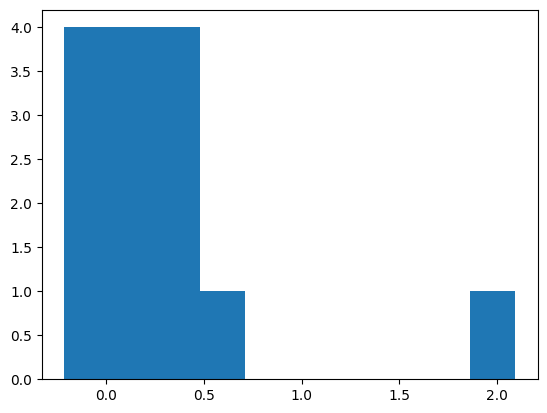

In [43]:
plt.hist(y_test - y_guess)

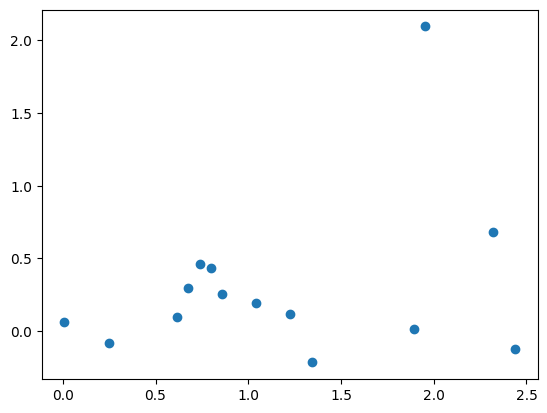

In [44]:
plt.scatter(y_guess, y_test - y_guess)

In [45]:
rateyear = hepdata_clean[['year', 'rate']]
rateyear.head()

,year,rate
0,1966,0.997792
1,1967,0.917968
2,1968,0.927329
3,1969,1.181747
4,1970,1.222642


In [46]:
rateyear.count()

year    2346
rate    2346
dtype: int64

In [47]:
xvalue = np.array(rateyear['year']).reshape((-1, 1))
yvalue = np.array(rateyear['rate'])

In [48]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xvalue, yvalue, test_size=0.3, random_state=0)
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)
LinearRegression()

LinearRegression()

In [49]:
y_guess1 = regressor1.predict(X_test1)

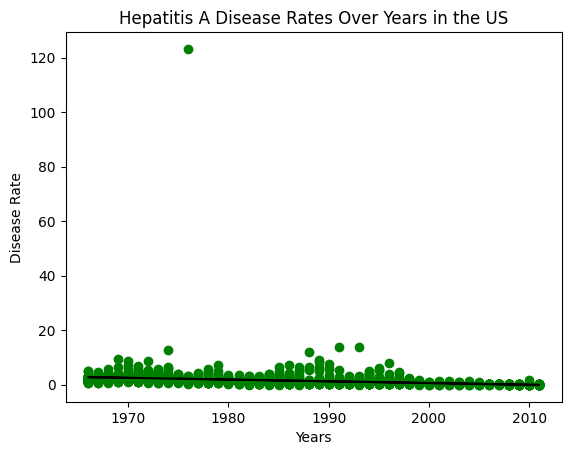

In [50]:
plt.scatter(X_train1, y_train1,color='g')
plt.plot(X_test1, y_guess1,color='k')
plt.xlabel("Years")
plt.ylabel("Disease Rate")
plt.title("Hepatitis A Disease Rates Over Years in the US")
plt.show()

In [51]:
filtered_rateyear = rateyear.query('rate < 100')
filtered_rateyear.count()

year    2345
rate    2345
dtype: int64

In [52]:
xvalue = np.array(filtered_rateyear['year']).reshape((-1, 1))
yvalue = np.array(filtered_rateyear['rate'])

In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xvalue, yvalue, test_size=0.3, random_state=0)
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)


LinearRegression()

In [54]:
y_guess1 = regressor1.predict(X_test1)

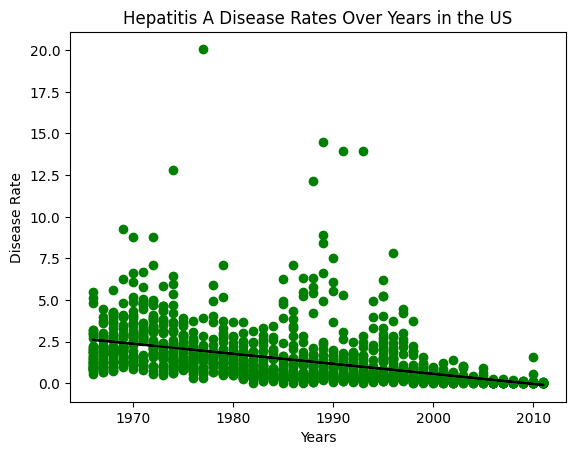

In [55]:
plt.scatter(X_train1, y_train1,color='g')
plt.plot(X_test1, y_guess1,color='k')
plt.xlabel("Years")
plt.ylabel("Disease Rate")
plt.title("Hepatitis A Disease Rates Over Years in the US")
plt.show()

In [56]:
#Degree of relationship
r_sq = regressor1.score(X_train1, y_train1)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.25403214197775736


In [57]:
#mean squared error on testing data
testmeansqerr = mean_squared_error(y_true = y_test1, y_pred = regressor1.predict(X_test1))
print(testmeansqerr)

1.4471338174967123


In [58]:
#mean squared error on training data 
trainmeansqerr = mean_squared_error(y_true = y_train1, y_pred = regressor1.predict(X_train1))
print(trainmeansqerr)

1.9143330727092542


(array([248., 393.,  48.,   9.,   3.,   1.,   1.,   0.,   0.,   1.]),
 array([-2.18387218, -0.50866275,  1.16654669,  2.84175612,  4.51696556,
         6.19217499,  7.86738442,  9.54259386, 11.21780329, 12.89301273,
        14.56822216]),
 <BarContainer object of 10 artists>)

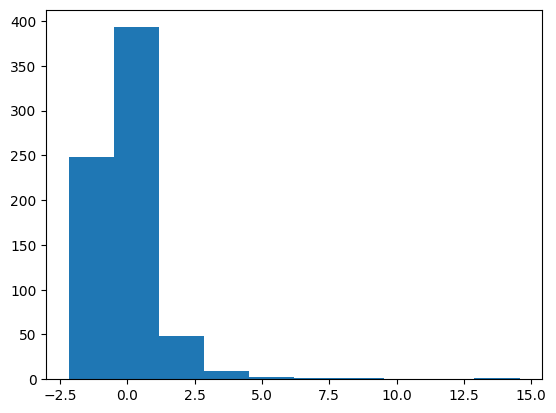

In [59]:
plt.hist(y_test1 - y_guess1)

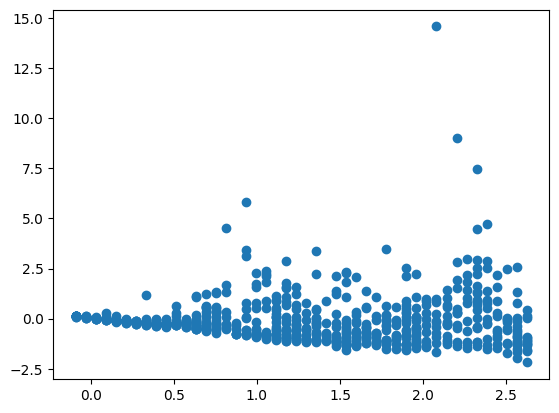

In [60]:
plt.scatter(y_guess1, y_test1 - y_guess1)